In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Goal
From the large dataframe
```
census_health_ff_2011_2016.csv
```
from Analysis/data
get the data for Per Capita Income.


In [2]:
big_df = pd.read_csv('census_health_ff_2011_2016.csv')
big_df.head()

,County,Household Income 2011,Population 2011,Median Age 2011,Per Capita Income 2011,Poverty Count 2011,Employed Persons Over 16 2011,Unemployed Persons Over 16 2011,Household Income 2016,Population 2016,...,"Fast-food restaurants (% change), 2011-16","Fast-food restaurants/10,000 pop, 2011","Fast-food restaurants/10,000 pop, 2016","Fast-food restaurants/1,000 pop (% change), 2011-16",Obesity 2011 %,Obesity 2016 %,New Diabetes per 1k : 2011,New Diabetes per 1k : 2016,Diagnosed Diabetes 2011 %,Diagnosed Diabetes 2016 %
0,Alameda,70821.0,1494876.0,36.4,34937.0,173156.0,792734.0,401593.0,79831.0,1605217.0,...,18.623853,7.11388,7.82102,9.940291,20.2,19.2,7.3,5.6,7.7,6.7
1,Alpine,59018.0,1167.0,40.4,29576.0,170.0,581.0,351.0,62375.0,1184.0,...,-100.000000,18.29826,0.00000,-100.000000,22.6,20.9,8.4,4.1,8.0,4.6
2,Amador,56180.0,38244.0,48.0,28030.0,3372.0,15650.0,17192.0,57032.0,36963.0,...,75.000000,3.19668,5.60403,75.308222,24.8,29.8,8.3,10.1,7.8,10.4
3,Butte,42971.0,219309.0,37.2,23431.0,42283.0,101633.0,77585.0,44366.0,223877.0,...,7.482993,6.68173,6.97495,4.388394,24.2,27.2,9.0,8.0,8.6,8.7
4,Calaveras,55256.0,45794.0,49.0,28667.0,3751.0,20270.0,17987.0,53502.0,44787.0,...,15.384615,5.75692,6.62032,14.997581,23.9,30.4,7.6,7.9,7.4,8.3


In [3]:
big_df.columns

Index(['County', 'Household Income 2011', 'Population 2011', 'Median Age 2011',
       'Per Capita Income 2011', 'Poverty Count 2011',
       'Employed Persons Over 16 2011', 'Unemployed Persons Over 16 2011',
       'Household Income 2016', 'Population 2016', 'Median Age 2016',
       'Per Capita Income 2016', 'Poverty Count 2016',
       'Employed Persons Over 16 2016', 'Unemployed Persons Over 16 2016',
       'Fast-food restaurants, 2011', 'Fast-food restaurants, 2016',
       'Fast-food restaurants (% change), 2011-16',
       'Fast-food restaurants/10,000 pop, 2011',
       'Fast-food restaurants/10,000 pop, 2016',
       'Fast-food restaurants/1,000 pop (% change), 2011-16', 'Obesity 2011 %',
       'Obesity 2016 %', 'New Diabetes per 1k : 2011',
       'New Diabetes per 1k : 2016', 'Diagnosed Diabetes 2011 %',
       'Diagnosed Diabetes 2016 %'],
      dtype='object')

In [4]:
income_df = big_df[['County','Per Capita Income 2011','Per Capita Income 2016']]
income_df.head()

,County,Per Capita Income 2011,Per Capita Income 2016
0,Alameda,34937.0,39042.0
1,Alpine,29576.0,26783.0
2,Amador,28030.0,27496.0
3,Butte,23431.0,25077.0
4,Calaveras,28667.0,30577.0


In [5]:
fips_df = pd.read_csv('fips.csv')
fips_df.head(1)

,County,CountyFIPS
0,Alameda,6001


In [6]:
fips_per_capita_df = pd.merge(fips_df, income_df, how='outer', on='County')
fips_per_capita_df.head()

,County,CountyFIPS,Per Capita Income 2011,Per Capita Income 2016
0,Alameda,6001,34937.0,39042.0
1,Alpine,6003,29576.0,26783.0
2,Amador,6005,28030.0,27496.0
3,Butte,6007,23431.0,25077.0
4,Calaveras,6009,28667.0,30577.0


In [7]:
fips_per_capita_df['Income Percent Change'] = ((fips_per_capita_df['Per Capita Income 2016'] - fips_per_capita_df['Per Capita Income 2011'])/fips_per_capita_df['Per Capita Income 2011'])* 100

In [8]:
fips_per_capita_df.head()

,County,CountyFIPS,Per Capita Income 2011,Per Capita Income 2016,Income Percent Change
0,Alameda,6001,34937.0,39042.0,11.749721
1,Alpine,6003,29576.0,26783.0,-9.443468
2,Amador,6005,28030.0,27496.0,-1.905102
3,Butte,6007,23431.0,25077.0,7.024882
4,Calaveras,6009,28667.0,30577.0,6.662713


In [9]:
fips_per_capita_df['Income Percent Change'] = fips_per_capita_df['Income Percent Change'].map("{:.2f}".format)


In [12]:
fips_per_capita_df = fips_per_capita_df.astype({"Income Percent Change": float})

(array([ 5., 32., 17.,  4.]),
 array([-9.44  , -1.5925,  6.255 , 14.1025, 21.95  ]),
 <a list of 4 Patch objects>)

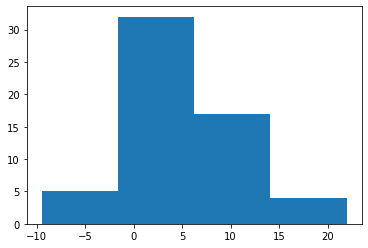

In [13]:
plt.hist(fips_per_capita_df['Income Percent Change'], bins=4)

In [6]:
fips_per_capita_df['Income Change'] = fips_per_capita_df['Per Capita Income 2016'] - fips_per_capita_df['Per Capita Income 2011']

In [17]:
fips_per_capita_df.head()

,County,CountyFIPS,Per Capita Income 2011,Per Capita Income 2016,Income Change
0,Alameda,6001,34937.0,39042.0,4105.0
1,Alpine,6003,29576.0,26783.0,-2793.0
2,Amador,6005,28030.0,27496.0,-534.0
3,Butte,6007,23431.0,25077.0,1646.0
4,Calaveras,6009,28667.0,30577.0,1910.0


In [14]:
fips_per_capita_df.to_csv('per_capita.csv', encoding="utf-8", index=False, header=True)

(array([28., 25.,  2.,  3.]),
 array([16593., 26096., 35599., 45102., 54605.]),
 <BarContainer object of 4 artists>)

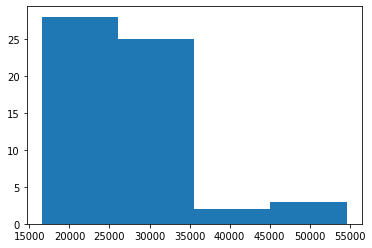

In [21]:
plt.hist(fips_per_capita_df['Per Capita Income 2011'], bins=4)

(array([31., 22.,  3.,  2.]),
 array([16311.  , 28135.25, 39959.5 , 51783.75, 63608.  ]),
 <BarContainer object of 4 artists>)

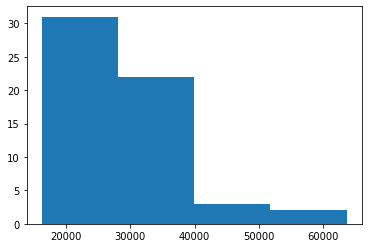

In [22]:
plt.hist(fips_per_capita_df['Per Capita Income 2016'], bins=4)

(array([ 9., 40.,  7.,  2.]),
 array([-2793.,   156.,  3105.,  6054.,  9003.]),
 <BarContainer object of 4 artists>)

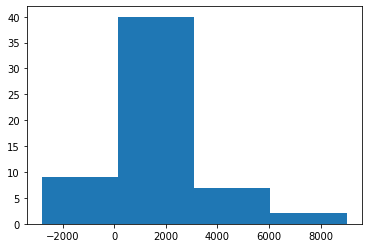

In [23]:
plt.hist(fips_per_capita_df['Income Change'], bins=4)